# Pregunta 1: Extracción de datos de acciones de Tesla (yfinance) – 2 puntos

In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
# Pregunta 2: Extracción de ingresos de Tesla (Web Scraping) – 1 punto

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Paso 1: Descargar el HTML
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url_tesla).text
soup = BeautifulSoup(html, "html.parser")

# Paso 2: Buscar la tabla que contiene los ingresos
table = soup.find_all("table")[1]  # Generalmente es la segunda tabla
rows = table.find_all("tr")

# Paso 3: Extraer los datos
tesla_revenue = []

for row in rows[1:]:  # Saltar la cabecera
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue.append({"Date": date, "Revenue": float(revenue)})

# Paso 4: Convertir a DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue)
print(tesla_revenue_df.head())

IndexError: list index out of range

In [4]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
#Pregunta 4: Extracción de ingresos de GameStop (Web Scraping)

In [10]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
print(f"Se encontraron {len(tables)} tablas.")

Se encontraron 6 tablas.


In [ ]:
#Pregunta 5: Panel de acciones e ingresos de Tesla

NameError: name 'tesla_revenue' is not defined

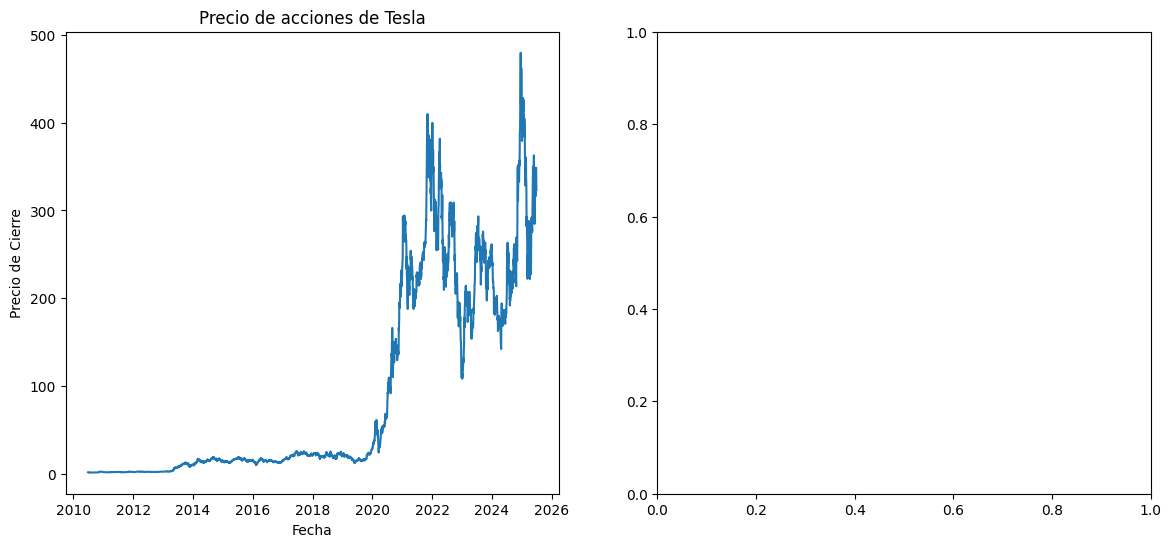

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Precio de acción
plt.subplot(1, 2, 1)
plt.plot(tesla_data["Date"], tesla_data["Close"])
plt.title("Precio de acciones de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")

# Ingresos
plt.subplot(1, 2, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"])
plt.title("Ingresos de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Pregunta 6: Panel de acciones e ingresos de GameStop

NameError: name 'gamestop_revenue' is not defined

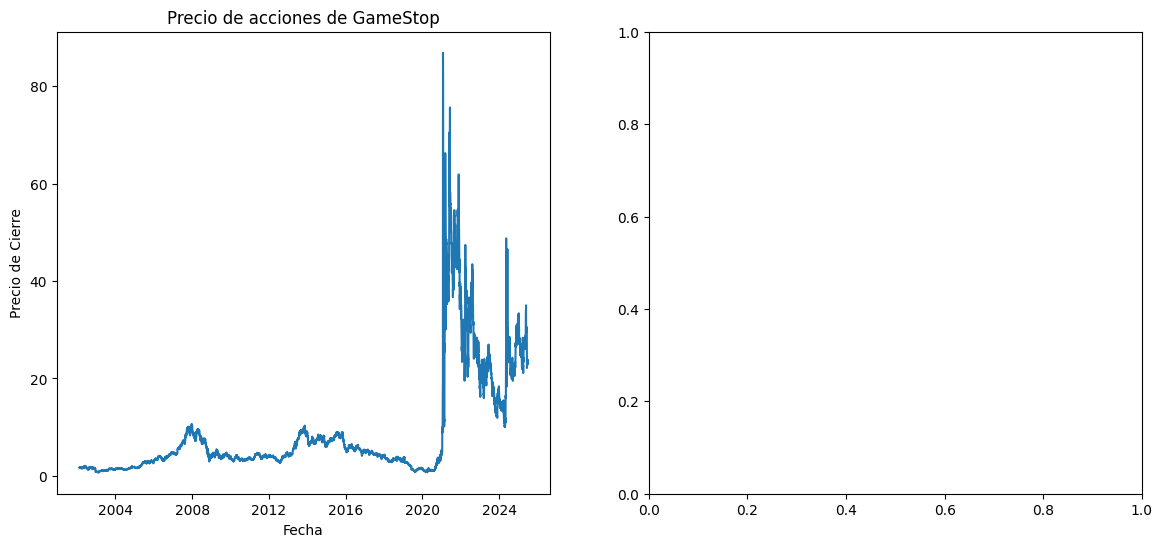

In [7]:
plt.figure(figsize=(14,6))

# Precio de acción
plt.subplot(1, 2, 1)
plt.plot(gamestop_data["Date"], gamestop_data["Close"])
plt.title("Precio de acciones de GameStop")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")

# Ingresos
plt.subplot(1, 2, 2)
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"])
plt.title("Ingresos de GameStop")
plt.xlabel("Fecha")
plt.ylabel("Ingresos (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()